In [11]:
# тест на стационарность и попытка предсказать с помощью ARIMA

In [12]:
# импорт
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error, max_error

In [13]:
# получение данных 
# (так как они копируют получение данных в 2, то загрузим сохраненный обработанный датасет)
df_rename = pd.read_csv('../data/gdelt_counts_event_by_day_clear.csv', index_col='date', parse_dates=['date']);

In [14]:
# выбираем одно из полей
df_one = df_rename['EXHIBIT FORCE POSTURE']

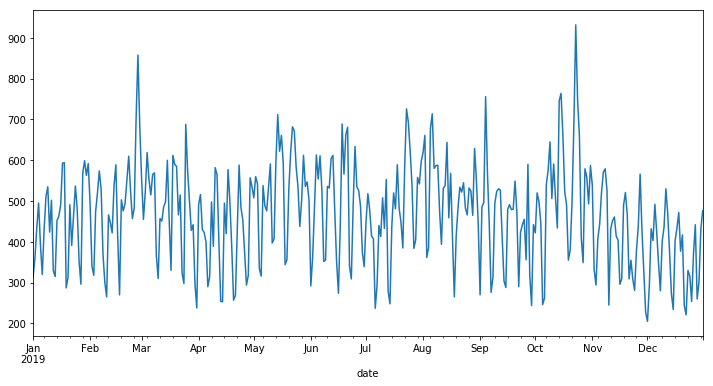

In [15]:
# посмотрим на график
df_one.plot(figsize=(12,6))

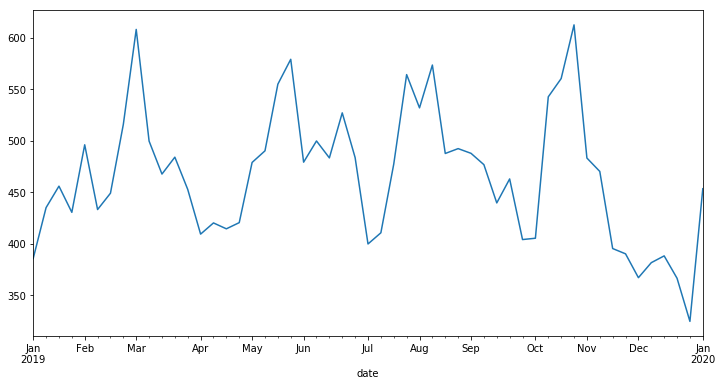

In [16]:
# для упращения работы можно усреднить по неделям, сравним в конце усредненный и неусредненные графики
df_one_week = df_one.resample('W').mean()
df_one_week.plot(figsize=(12,6))

In [17]:
# проверяем на стационарность
adfuller_test = adfuller(df_one)
print('ADF статистика: %f' % adfuller_test[0])
print('Вероятность: %f' % adfuller_test[1])
print('Границы критических значений:')
for key, value in adfuller_test[4].items():
    print('\t%s: %.3f' % (key, value))
if adfuller_test[0] > adfuller_test[4]['5%']: 
    print('Заключение(5%):есть единичные корни, ряд не стационарен')
else:
    print( 'Заключение(5%):единичных корней нет, ряд стационарен')

ADF статистика: -3.588737
Вероятность: 0.005980
Границы критических значений:
	1%: -3.449
	5%: -2.870
	10%: -2.571
Заключение(5%):единичных корней нет, ряд стационарен


C:\Users\ikzn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ikzn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                                ARMA Model Results                               
Dep. Variable:     EXHIBIT FORCE POSTURE   No. Observations:                  365
Model:                        ARMA(5, 1)   Log Likelihood               -2174.634
Method:                          css-mle   S.D. of innovations             93.429
Date:                   Wed, 15 Apr 2020   AIC                           4365.267
Time:                           00:28:59   BIC                           4396.466
Sample:                       01-01-2019   HQIC                          4377.666
                            - 12-31-2019                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         460.2129     20.066     22.935      0.000     420.885     499.541
ar.L1.EXHIBIT FORCE POSTURE     1.2984      0.069     18

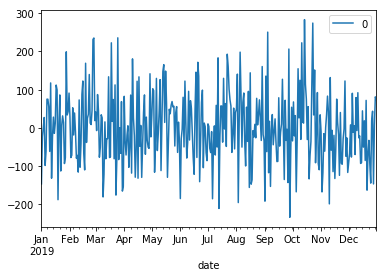

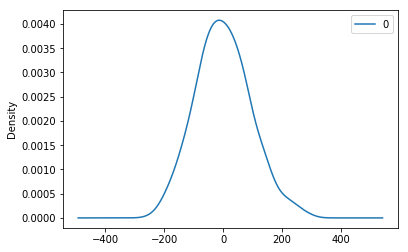

                0
count  365.000000
mean     0.794620
std     93.714160
min   -233.728730
25%    -64.671602
50%     -3.256235
75%     59.300073
max    282.920667


In [18]:
# строим модель ARIMA
model = ARIMA(df_one, order=(5,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Средняя абсолютная ошибка: 78.266
Максимальная ошибка: 282.907


<Figure size 432x288 with 0 Axes>

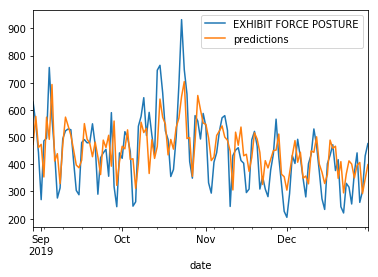

In [19]:
# ARIMA имеет три аргументаи.
# ARIMA(p,d,q), где p,d и q — целые неотрицательные числа, характеризующие порядок для частей модели (соответственно авторегрессионной, интегрированной и скользящего среднего)
# Порядок авторегрессии выставим - 5(для ускорения расчетов), порядок разности 0(ряд стационарен), порядок скользящего среднего возьмем 1
# Таким образом получи модель ARMA(5,1)
X = df_one
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat[0])
    obs = test[t]
    history.append(obs)
    #print('Предсказанное=%f, ожидаемое=%f' % (yhat, obs))
print('Средняя абсолютная ошибка: %.3f' % mean_absolute_error(test, predictions))
print('Максимальная ошибка: %.3f' % max_error(test, predictions))
plotdf = pd.DataFrame(test)
plotdf['predictions'] = predictions
plt.figure();
plotdf.plot()

Средняя абсолютная ошибка: 53.639
Максимальная ошибка: 120.193


<Figure size 432x288 with 0 Axes>

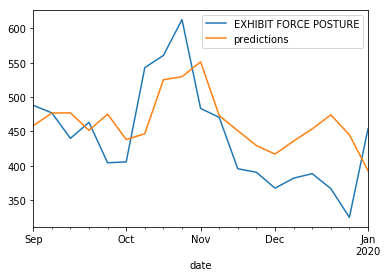

In [20]:
# ARIMA имеет три аргументаи.
# ARIMA(p,d,q), где p,d и q — целые неотрицательные числа, характеризующие порядок для частей модели (соответственно авторегрессионной, интегрированной и скользящего среднего)
# Порядок авторегрессии выставим - 5(для ускорения расчетов), порядок разности 0(ряд стационарен), порядок скользящего среднего возьмем 1
# Таким образом получи модель ARMA(5,1)
X = df_one_week
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat[0])
    obs = test[t]
    history.append(obs)
    #print('Предсказанное=%f, ожидаемое=%f' % (yhat, obs))
print('Средняя абсолютная ошибка: %.3f' % mean_absolute_error(test, predictions))
print('Максимальная ошибка: %.3f' % max_error(test, predictions))
plotdf = pd.DataFrame(test)
plotdf['predictions'] = predictions
plt.figure();
plotdf.plot()